# Fetal Health Classification

In [64]:
#Import packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import os

In [65]:
df=pd.read_csv('fetal_health.csv')

#### Exploratory Data Analysis 

In [66]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [67]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [163]:
df.shape #No null values are present in the data 

(2126, 22)

In [68]:
df['fetal_health'].value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

<AxesSubplot:xlabel='fetal_health', ylabel='count'>

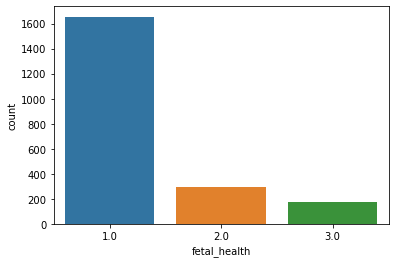

In [69]:
sns.countplot(x=df['fetal_health']) #data is not balanced


Fetal Health is classified as such:
- 1.0: Normal
- 2.0: Suspect
- 3.0: Pathological

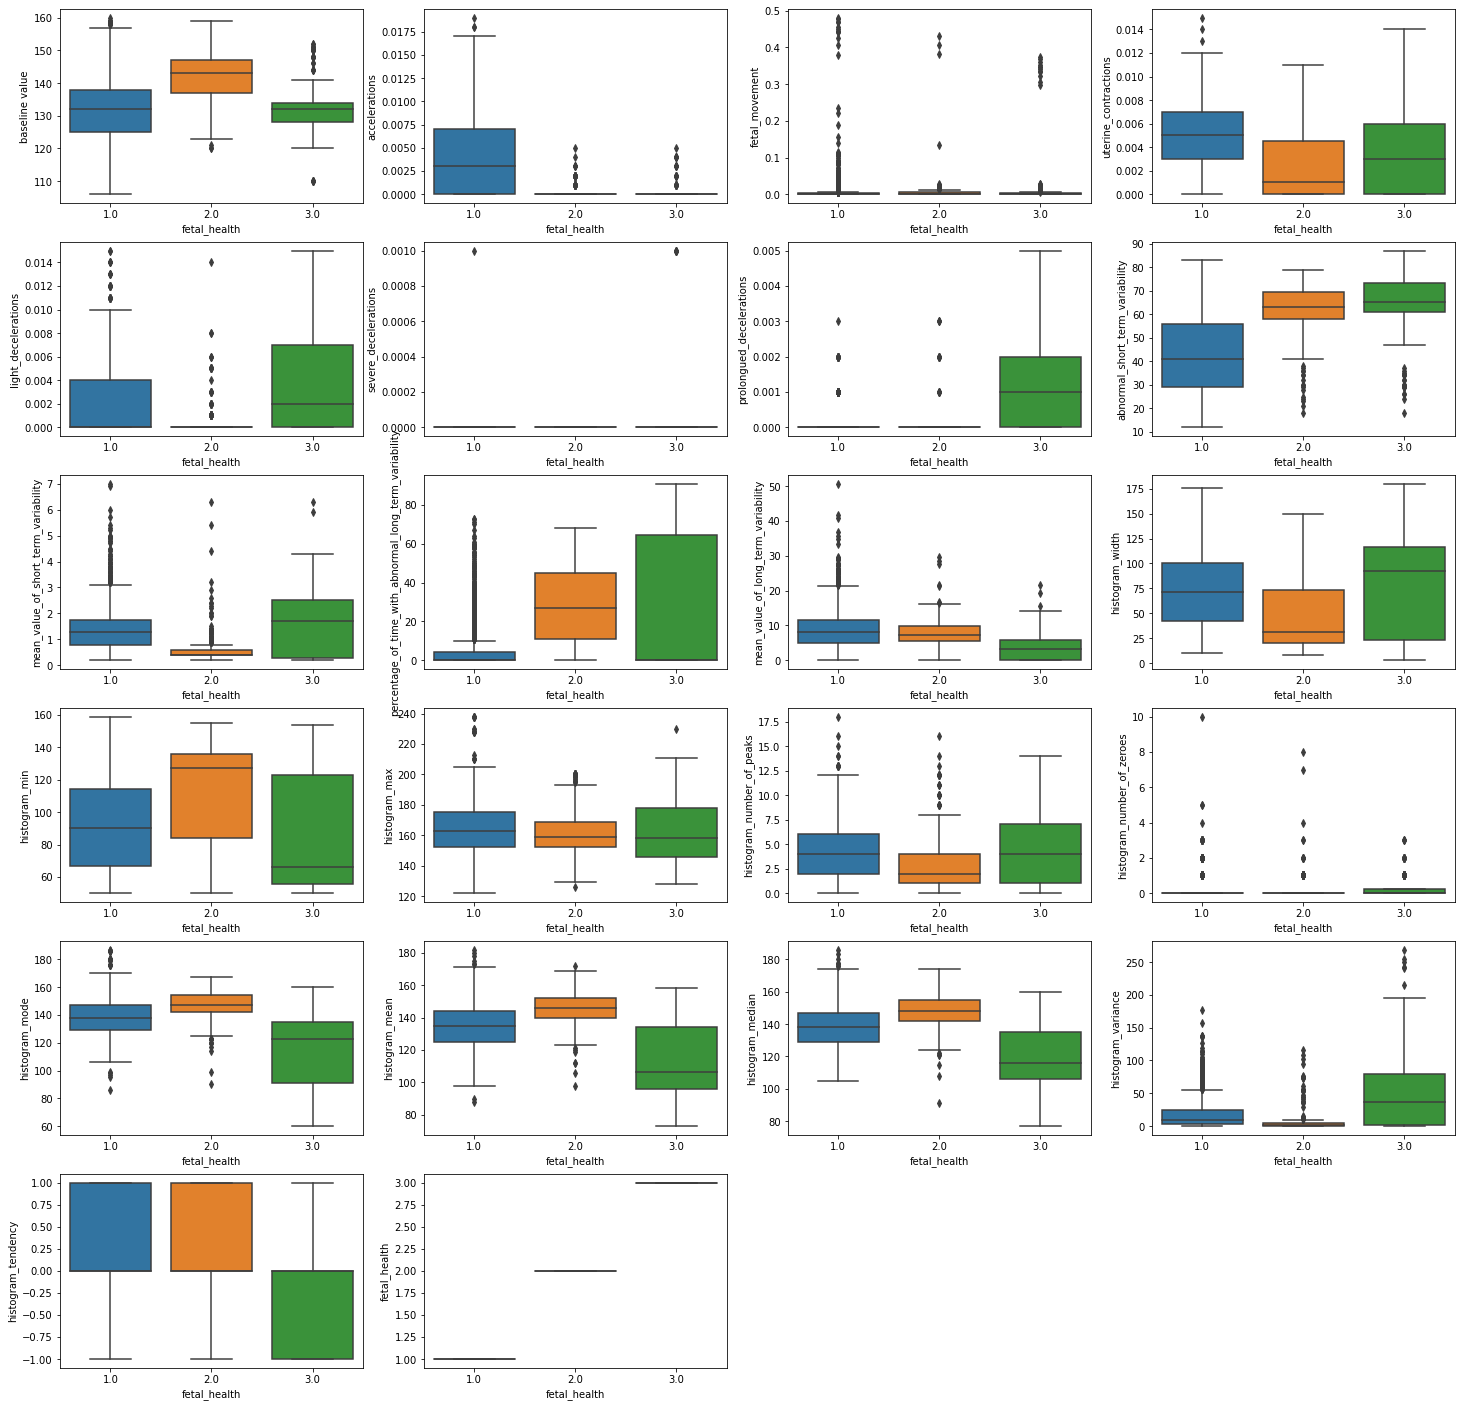

In [101]:
#identify outliers present in comparison to fetal health
#Outliers found here will not to be removed from original data 

plt.figure(figsize=(25,25))
i=1
for col in df.columns:
    plt.subplot(6,4,i)
    sns.boxplot(x = 'fetal_health', y = col, data = df)
    i+=1

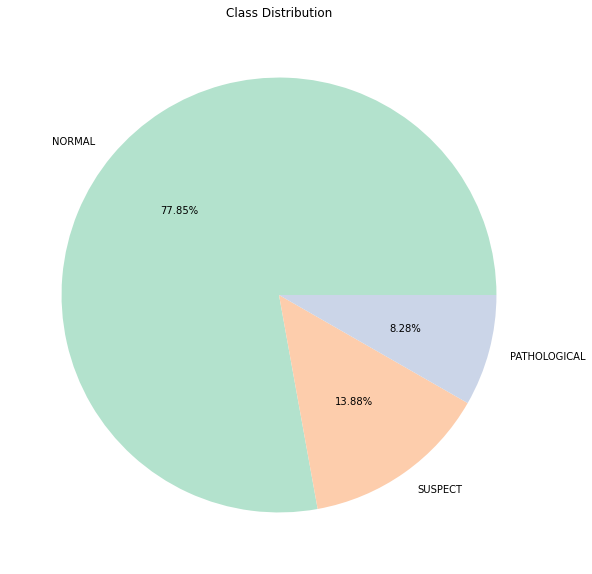

In [169]:
plt.figure(figsize=(10, 10))

plt.pie(
    df['fetal_health'].value_counts(),
    autopct='%.2f%%',
    labels=["NORMAL", "SUSPECT", "PATHOLOGICAL"],
    colors=sns.color_palette('Pastel2')
)

plt.title("Class Distribution")
plt.show()

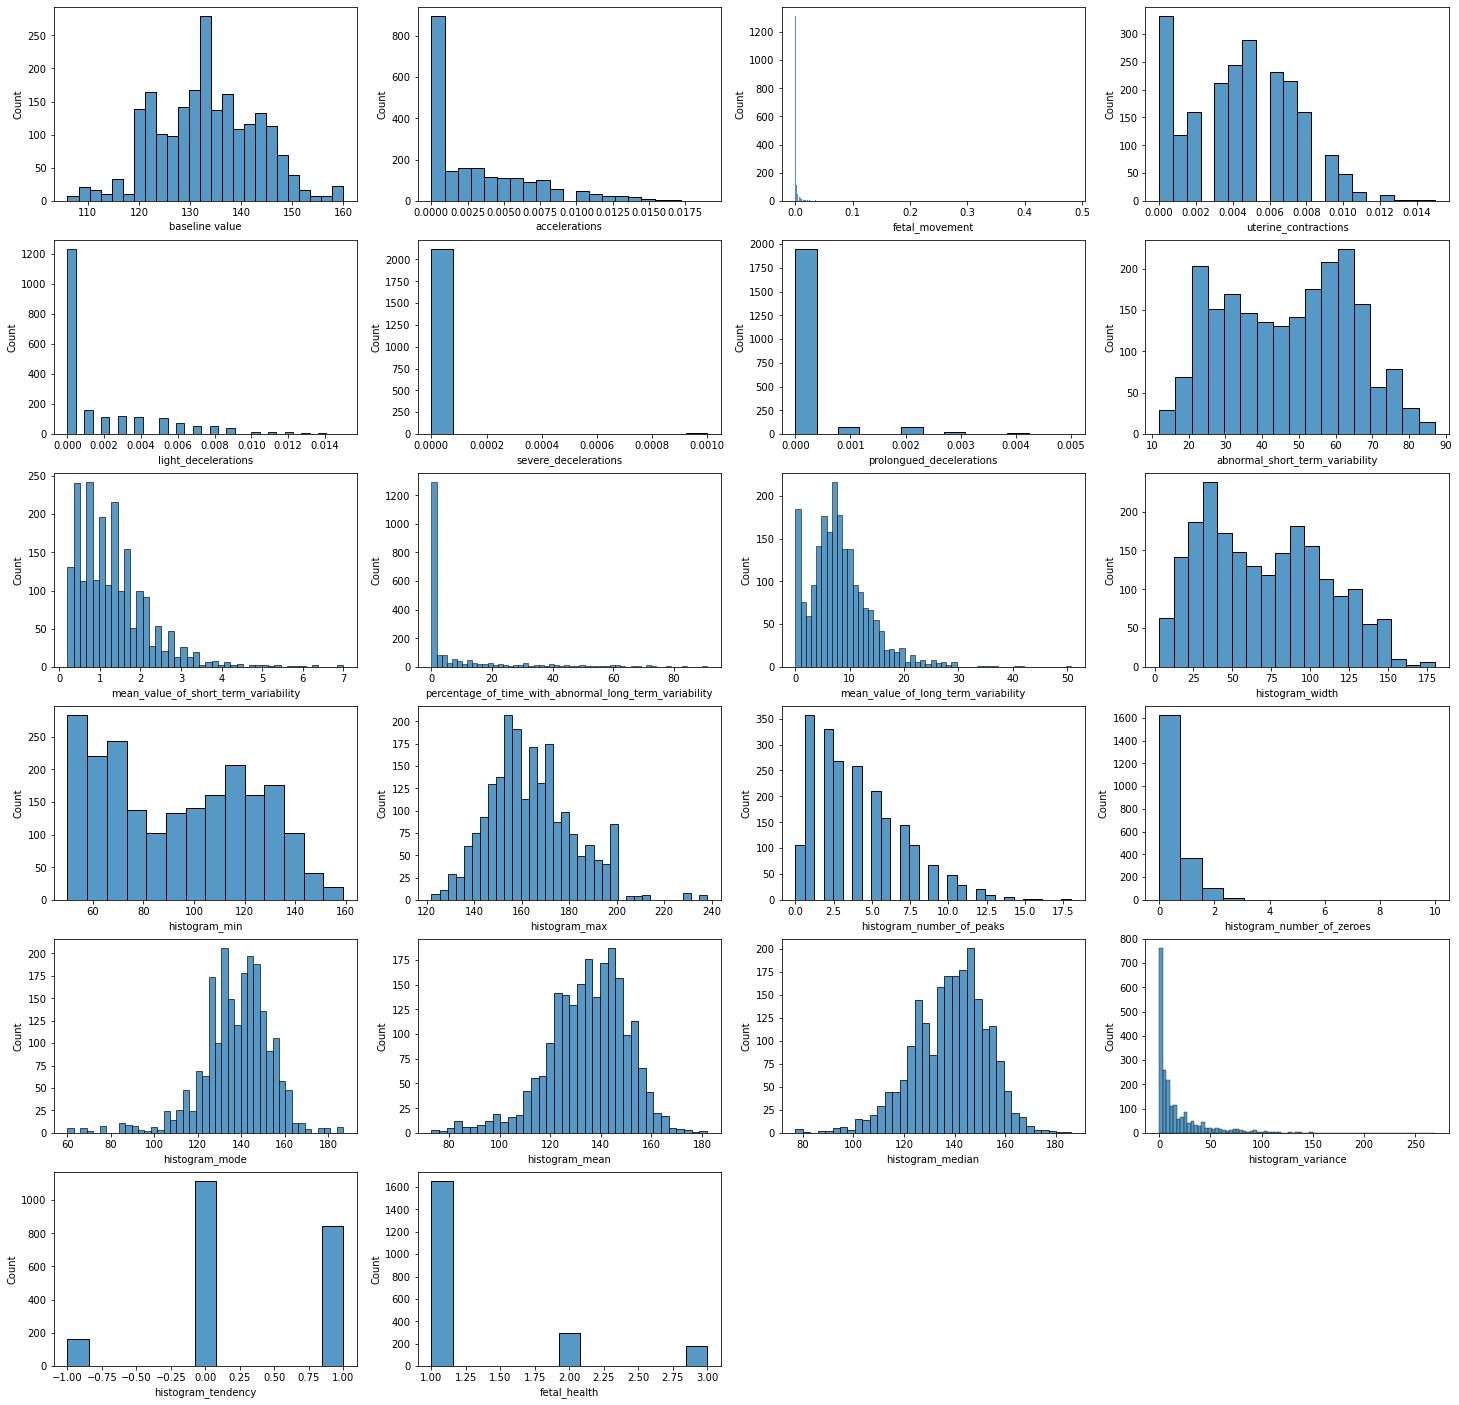

In [159]:
plt.figure(figsize=(25,25))
i=1
for col in df.columns:
    plt.subplot(6,4,i)
    sns.histplot(x= col, data = df)
    i+=1

#### Pre-Processing 

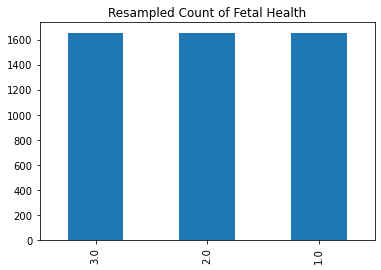

In [71]:
#Resample Imbalanced Data
from sklearn.utils import resample


# Divide by class
df_X = df[df['fetal_health'] == 1]
df_y = df[df['fetal_health'] == 2]
df_z = df[df['fetal_health'] == 3]

df_y_resample = resample(df_y,replace=True,n_samples=1655, random_state=123)
df_z_resample = resample(df_z,replace=True,n_samples=1655, random_state=123)

# Combine majority class with upsampled minority class
df_resample = pd.concat([df_X, df_y_resample, df_z_resample])
 
# Display new class counts
df_resample.fetal_health.value_counts()

df_resample.fetal_health.value_counts().plot(kind='bar', title='Resampled Count of Fetal Health');



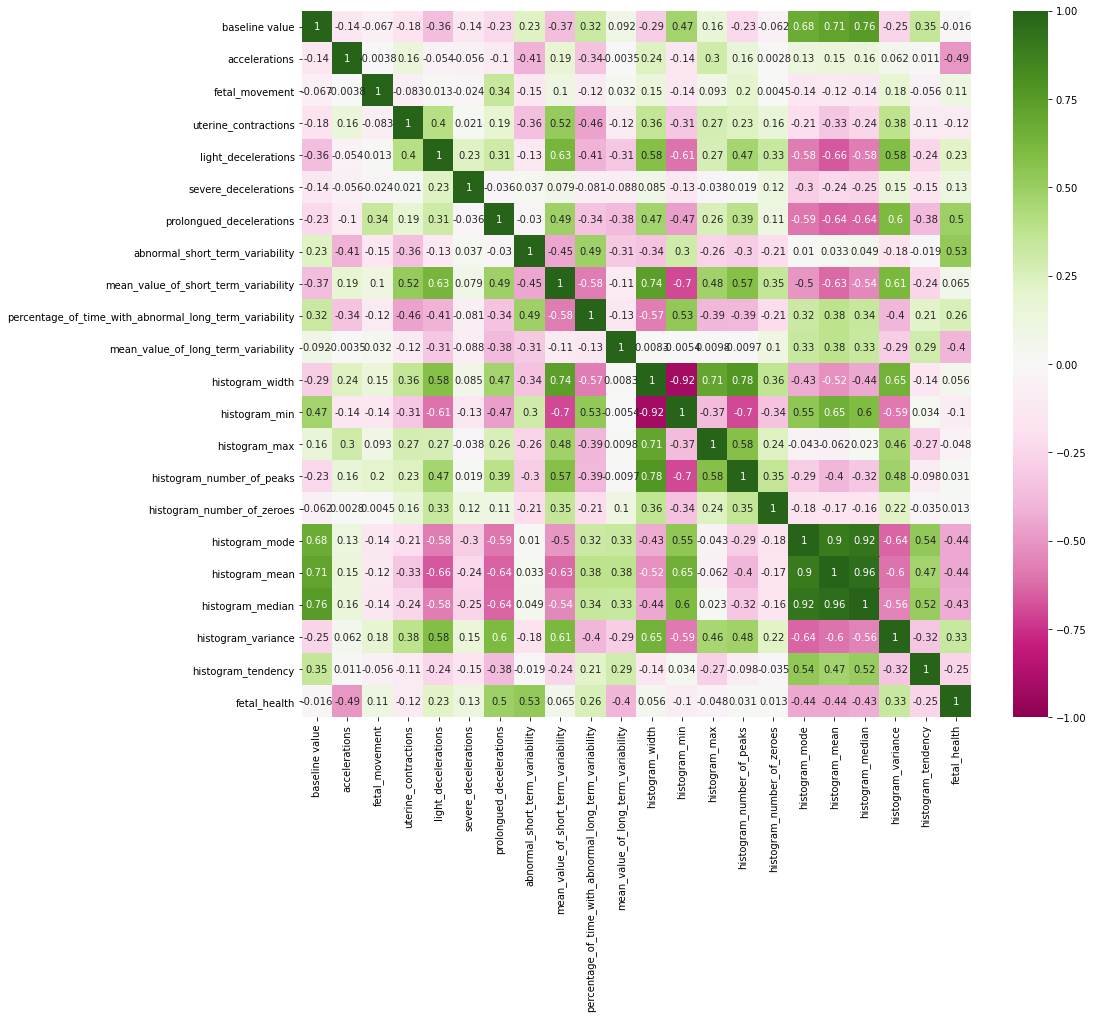

In [73]:
#Looking for common features
corr= df_resample.corr()
plt.figure(figsize=(15,13))
sns.heatmap(corr, vmin=-1, cmap='PiYG', annot=True)
plt.show()

In [74]:
corr[abs(corr['fetal_health']) > 0.1]['fetal_health']

accelerations                                            -0.493966
fetal_movement                                            0.109945
uterine_contractions                                     -0.116953
light_decelerations                                       0.225399
severe_decelerations                                      0.130942
prolongued_decelerations                                  0.498013
abnormal_short_term_variability                           0.530055
percentage_of_time_with_abnormal_long_term_variability    0.263020
mean_value_of_long_term_variability                      -0.399408
histogram_min                                            -0.101302
histogram_mode                                           -0.438739
histogram_mean                                           -0.438465
histogram_median                                         -0.428026
histogram_variance                                        0.331591
histogram_tendency                                       -0.25

<AxesSubplot:xlabel='baseline value', ylabel='accelerations'>

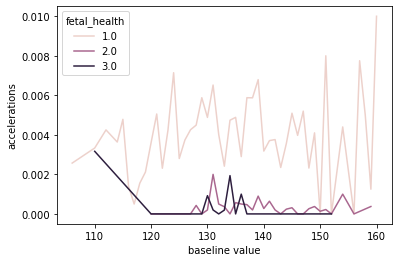

In [133]:
sns.lineplot(x='baseline value',y='accelerations',hue='fetal_health',err_style=None, data=df)
#Pathological fetal health has lesser amount of accelerations 

<AxesSubplot:xlabel='baseline value', ylabel='abnormal_short_term_variability'>

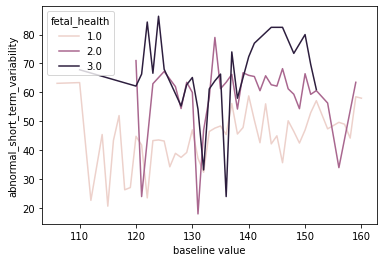

In [176]:
sns.lineplot(x='baseline value',y='abnormal_short_term_variability',hue='fetal_health', err_style=None, data=df)
#Pathological fetal health has higher amounts of abnormal variability 
#This feature is to be removed since it has a high VIF

<AxesSubplot:xlabel='baseline value', ylabel='prolongued_decelerations'>

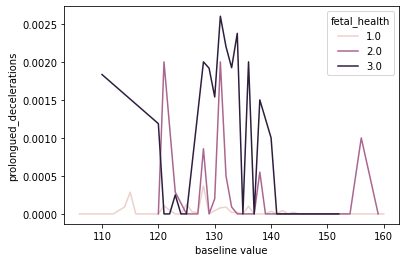

In [140]:
sns.lineplot(x='baseline value',y='prolongued_decelerations',hue='fetal_health', err_style=None, data=df)

In [141]:
#Spliting to training and testing data 
from sklearn.model_selection import train_test_split

X = df_resample[corr[abs(corr['fetal_health']) > 0.1]['fetal_health'].index]
y = df_resample['fetal_health']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=1)

In [142]:
import collections
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import traceback
import re
import string
import warnings

max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    #print("justmiss", justmiss)
    #print("notmiss", notmiss)
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            #print("I am here 1",r, n,len(d2))
            n = n - 1 
            
        except Exception as e:
            n = n - 1
            #print("I am here e",n)

    if len(d2) == 1:
        #print("I am second step ",r, n)
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        #print(justmiss.count().Y)
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    print(np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT))
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    #print("hi",d3.IV )
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    for i in x:
        print(i)
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                #print("Number and unique value greater than 2")
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                #print("I am here 2")
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [143]:
final_iv, IV = data_vars(X_train, y_train)

accelerations
0    0.0
1    NaN
dtype: float64
fetal_movement
0    0.0
1    NaN
dtype: float64
uterine_contractions
0   -0.059078
1    0.073319
dtype: float64
light_decelerations
0    0.0
1    NaN
dtype: float64
severe_decelerations
prolongued_decelerations
0    0.0
1    NaN
dtype: float64
abnormal_short_term_variability
0    0.566523
1    0.064370
2   -0.133735
3   -0.171944
dtype: float64
percentage_of_time_with_abnormal_long_term_variability
0    0.034020
1   -0.032325
dtype: float64
mean_value_of_long_term_variability
0   -0.178026
1    0.003872
2    0.044084
3    0.301283
dtype: float64
histogram_min
0   -0.043245
1    0.051042
dtype: float64
histogram_mode
0   -0.093559
1    0.130803
dtype: float64
histogram_mean
0   -0.082901
1    0.117690
dtype: float64
histogram_median
0   -0.087910
1    0.124087
dtype: float64
histogram_variance
0    0.013843
1   -0.014342
dtype: float64
histogram_tendency
0   -0.047798
1    0.106504
dtype: float64
fetal_health
0    0.408256
1   -0.283810
dty

In [153]:
features = list(IV[(IV['IV'] >= 0.02) & (IV['IV'] <= 0.8)]['VAR_NAME'])
X2 = X_train[features]
display(X2.shape)
X2.head()

(3723, 3)

,abnormal_short_term_variability,fetal_health,mean_value_of_long_term_variability
990,25.0,1.0,6.5
471,82.0,3.0,5.2
1414,43.0,1.0,6.1
1908,64.0,3.0,0.0
291,61.0,2.0,12.2


In [154]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def iterate_vif(df, vif_threshold=5, max_vif=6):
    count = 0
    while max_vif > vif_threshold:
        count += 1
        print("Iteration # "+str(count))
        vif = pd.DataFrame()
        vif["VIFactor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
        vif["features"] = df.columns
        
        if vif['VIFactor'].max() > vif_threshold:
            print('Removing %s with VIF of %f' % (vif[vif['VIFactor'] == vif['VIFactor'].max()]['features'].values[0], vif['VIFactor'].max()))
            df = df.drop(vif[vif['VIFactor'] == vif['VIFactor'].max()]['features'].values[0], axis=1)
            max_vif = vif['VIFactor'].max()
        else:
            print('Complete')
            return df, vif.sort_values('VIFactor')  

X1 = X2._get_numeric_data()
final_df, final_vif = iterate_vif(X1)

Iteration # 1
Removing abnormal_short_term_variability with VIF of 10.956241
Iteration # 2
Complete


#### Modeling

[[355  58  12]
 [ 64 312  45]
 [  3  60 333]]
0.8051529790660226
              precision    recall  f1-score   support

         1.0       0.84      0.84      0.84       425
         2.0       0.73      0.74      0.73       421
         3.0       0.85      0.84      0.85       396

    accuracy                           0.81      1242
   macro avg       0.81      0.81      0.81      1242
weighted avg       0.81      0.81      0.81      1242



/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:>

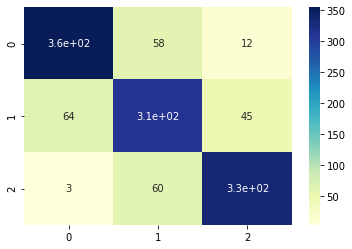

In [144]:
#Logsitic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

predictions_logreg=logreg.predict(X_test)
print(confusion_matrix(y_test, predictions_logreg))
logreg_as = accuracy_score(y_test, predictions_logreg)
print(logreg_as)
print(classification_report(y_test, predictions_logreg))

sns.heatmap(confusion_matrix(y_test, predictions_logreg),annot=True,cmap ="YlGnBu")

[[424   1   0]
 [  0 421   0]
 [  0   0 396]]
0.999194847020934
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       425
         2.0       1.00      1.00      1.00       421
         3.0       1.00      1.00      1.00       396

    accuracy                           1.00      1242
   macro avg       1.00      1.00      1.00      1242
weighted avg       1.00      1.00      1.00      1242



[Text(0.5, 1.0, 'Confusion Matrx of a Random Classifier Model')]

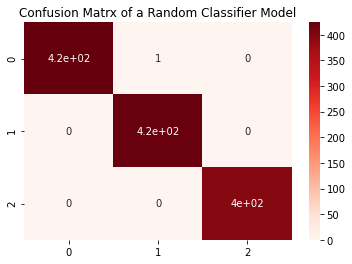

In [145]:
#Random Forrest Classifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state = 1,n_jobs=-1)
model_res = rfc.fit(X_train, y_train)
predictions_rfc = model_res.predict(X_test)

print(confusion_matrix(y_test, predictions_rfc))
rfc_as = accuracy_score(y_test, predictions_rfc)
print(rfc_as)
print(classification_report(y_test, predictions_rfc))

sns.heatmap(confusion_matrix(y_test, predictions_rfc),annot=True,cmap ="Reds").set(title='Confusion Matrx of a Random Classifier Model')

[[425   0   0]
 [  0 421   0]
 [  0   0 396]]
1.0
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       425
         2.0       1.00      1.00      1.00       421
         3.0       1.00      1.00      1.00       396

    accuracy                           1.00      1242
   macro avg       1.00      1.00      1.00      1242
weighted avg       1.00      1.00      1.00      1242



[Text(0.5, 1.0, 'Confusion Matrx of a Gradient Boosting Model')]

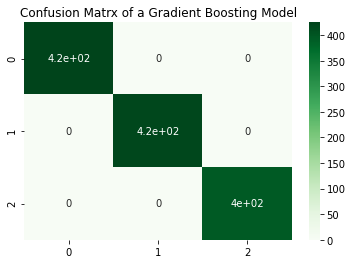

In [146]:
#Gradient Boosting 
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators = 20, random_state = 0)
gb.fit(X_train, y_train)
predictions_gb = gb.predict(X_test)

print(confusion_matrix(y_test, predictions_gb))
gb_as = accuracy_score(y_test, predictions_gb)
print(gb_as)
print(classification_report(y_test, predictions_gb))

sns.heatmap(confusion_matrix(y_test, predictions_gb),annot=True,cmap ="Greens").set(title='Confusion Matrx of a Gradient Boosting Model')

In [147]:
#Accuracy Scores of different Algorithims
print("Logistic Regression: %.2f%%" % (accuracy_score(y_test, predictions_logreg) * 100.0))
print("Random Forrest Classifier: %.2f%%" % (accuracy_score(y_test, predictions_rfc) * 100.0))
print("Gradient Boosting: %.2f%%" % (accuracy_score(y_test, predictions_gb) * 100.0))

Logistic Regression: 80.52%
Random Forrest Classifier: 99.92%
Gradient Boosting: 100.00%


Text(0.5, 1.0, 'Model Accuracy Comparison')

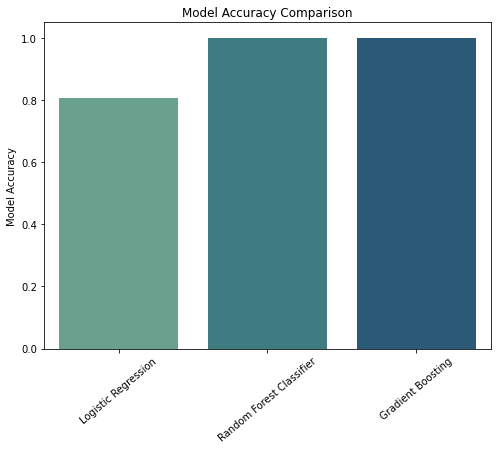

In [149]:
x = ["Logistic Regression","Random Forest Classifier", "Gradient Boosting"]

y = [logreg_as,rfc_as, gb_as]

fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x=x,y=y, palette="crest");
plt.ylabel("Model Accuracy")
plt.xticks(rotation=40)
plt.title("Model Accuracy Comparison")

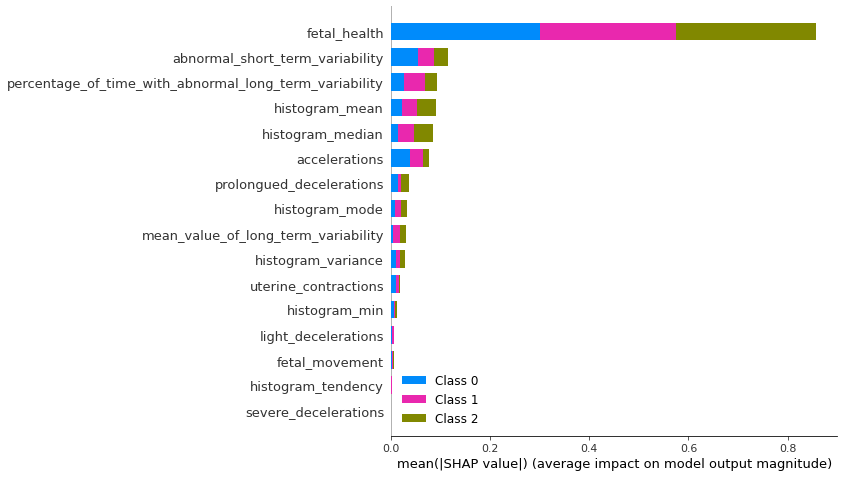

In [150]:
#Shap Analysis
import shap
shap_values = shap.TreeExplainer(rfc).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

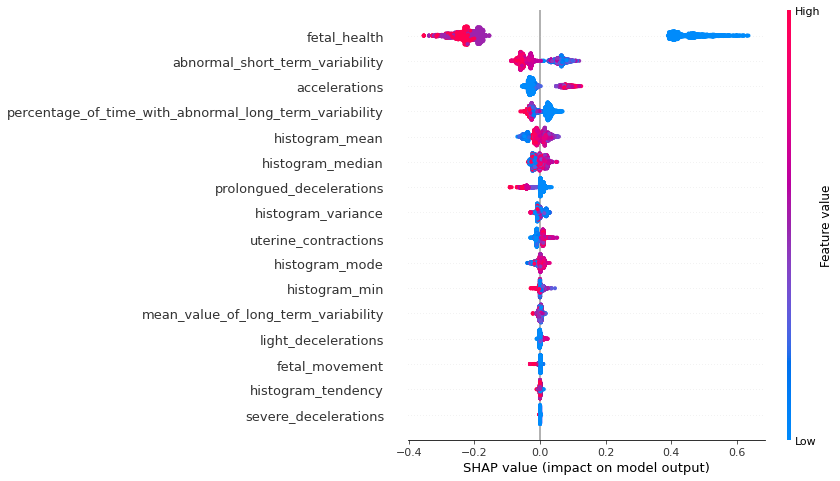

In [151]:
shap.summary_plot(shap_values[0], X_train)